### Zig Zag Sampler

Running for 1,000,000 iterations:   0%|          | 0/1000000 [00:00<?, ?it/s]

Running for 1,000,000 iterations:   0%|          | 0/1000000 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

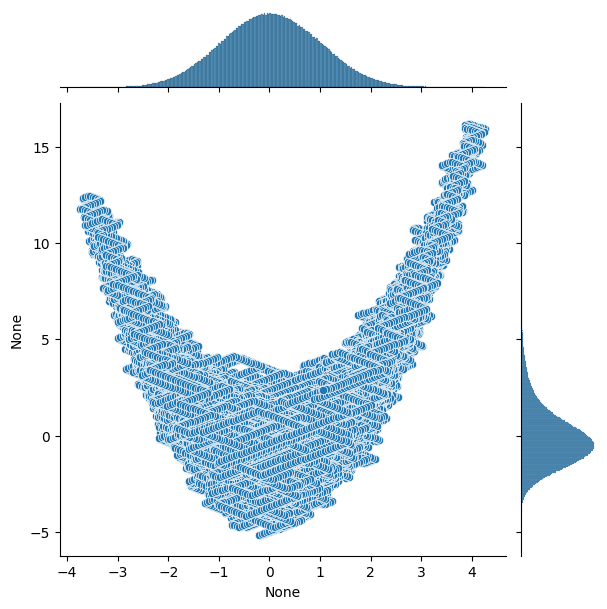

In [1]:
import os

os.environ["XLA_FLAGS"] = "--xla_cpu_use_thunk_runtime=false"

import jax


jax.config.update("jax_enable_x64", True)
# NB: this is not necessary, but it is useful to avoid numerical issues. It must be done before importing pdmp_jax.

import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdmp_jax as pdmp


# define a potential
# here 2D banana potential and gaussian on the other dimensions
def U(x):
    mean_x2 = x[0] ** 2 - 1
    return -(-(x[0] ** 2) + -((x[1] - mean_x2) ** 2) - jnp.sum((x[2:]) ** 2)) / 2


dim = 50
# define the gradient of the potential
grad_U = jax.grad(U)
seed = 8
key = jax.random.PRNGKey(seed)
xinit = jnp.ones((dim,))  # initial position
vinit = jnp.ones((dim,))  # initial velocity
grid_size = 10
N_sk = 1000000  # number of skeleton points
N = 1000000  # number of samples
sampler = pdmp.ZigZag(dim, grad_U, grid_size)
# sample the skeleton of the process
out = sampler.sample_skeleton(N_sk, xinit, vinit, seed, verbose=True)

# # sample from the skeleton
sample = sampler.sample_from_skeleton(N, out)

# other possibilty : use sample() method directly
sample2 = sampler.sample(
    N_sk=N_sk, N_samples=N, xinit=xinit, vinit=vinit, seed=seed, verbose=True
)

# plot the first two dimensions of the sample
plt.figure()
sns.jointplot(x=sample[:, 0], y=sample[:, 1])
plt.show()


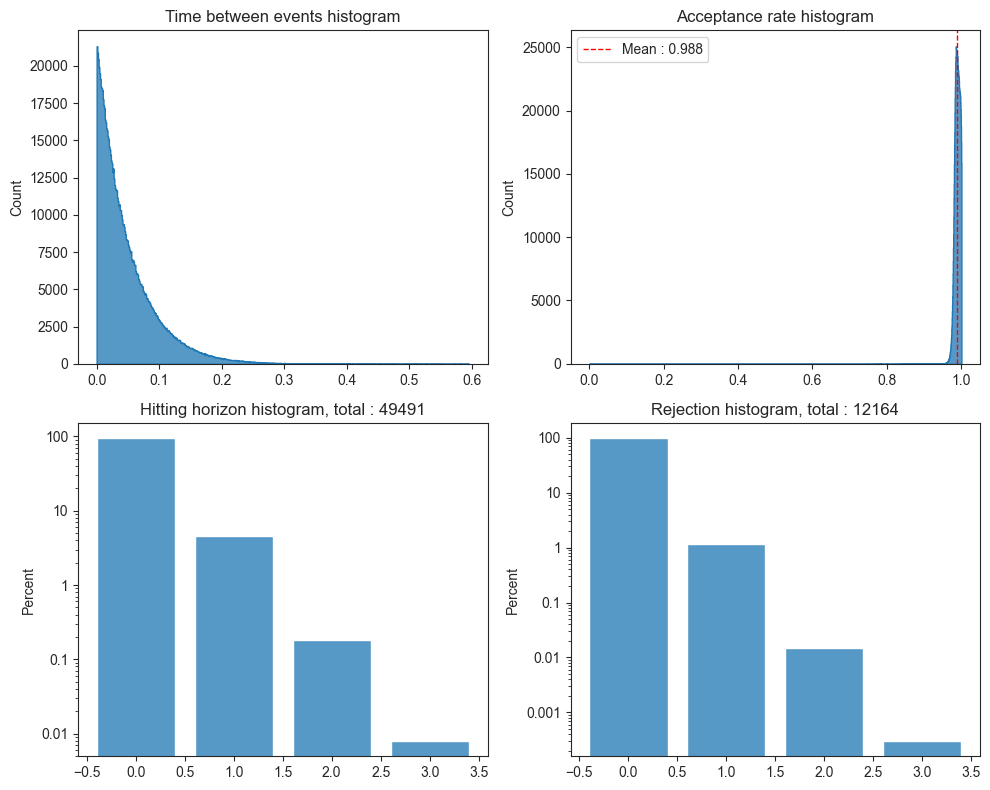

number of error bound :  0


In [2]:
# plot some quantities of interest
pdmp.plot(out)

#### Forward Event Chain

Running for 1,000,000 iterations:   0%|          | 0/1000000 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

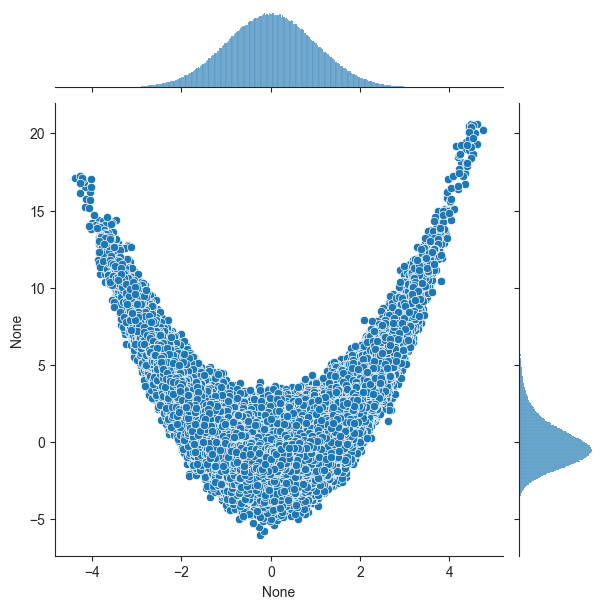

In [3]:
sampler = pdmp.ForwardEventChain(dim, grad_U, grid_size)
# sample the process
sample_fec = sampler.sample(
    N_sk=N_sk, N_samples=N, xinit=xinit, vinit=vinit, seed=seed, verbose=True
)

# plot the first two dimensions of the sample
plt.figure()
sns.jointplot(x=sample_fec[:, 0], y=sample_fec[:, 1])
plt.show()

#### Bouncy Particle Sampler

Running for 1,000,000 iterations:   0%|          | 0/1000000 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

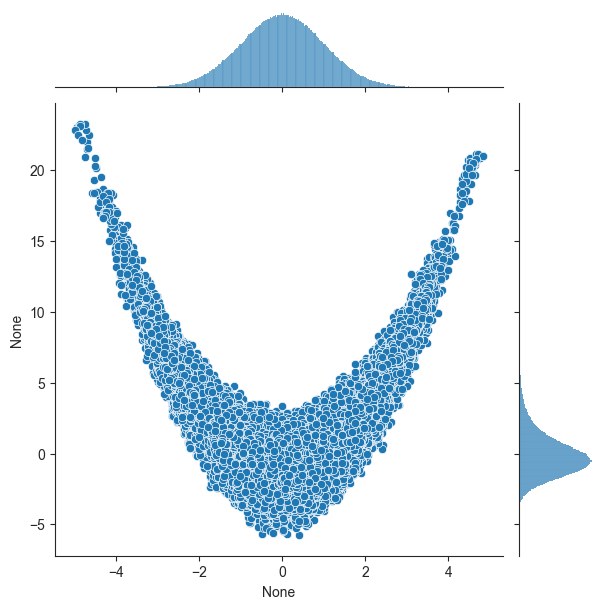

In [4]:
sampler = pdmp.BouncyParticle(dim, grad_U, grid_size)  # by default refresh rate of 0.1
# sample the process
sample_bps = sampler.sample(
    N_sk=N_sk, N_samples=N, xinit=xinit, vinit=vinit, seed=seed, verbose=True
)

# plot the first two dimensions of the sample
plt.figure()
sns.jointplot(x=sample_bps[:, 0], y=sample_bps[:, 1])
plt.show()

#### Boomerang Sampler

Running for 1,000,000 iterations:   0%|          | 0/1000000 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

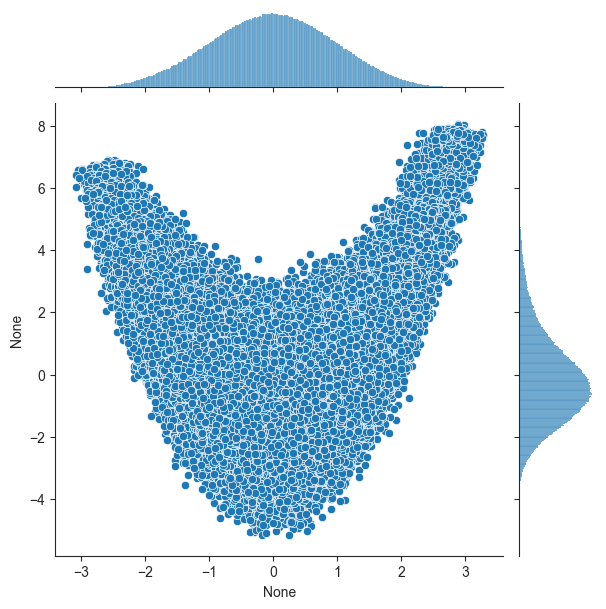

In [5]:
sampler = pdmp.Boomerang(dim, grad_U, grid_size)  # by default refresh rate of 0.1

sample_boom = sampler.sample(
    N_sk=N_sk, N_samples=N, xinit=xinit, vinit=vinit, seed=seed, verbose=True
)

# plot the first two dimensions of the sample
plt.figure()
sns.jointplot(x=sample_boom[:, 0], y=sample_boom[:, 1])
plt.show()


#### Speedup Zig Zag

Running for 1,000,000 iterations:   0%|          | 0/1000000 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

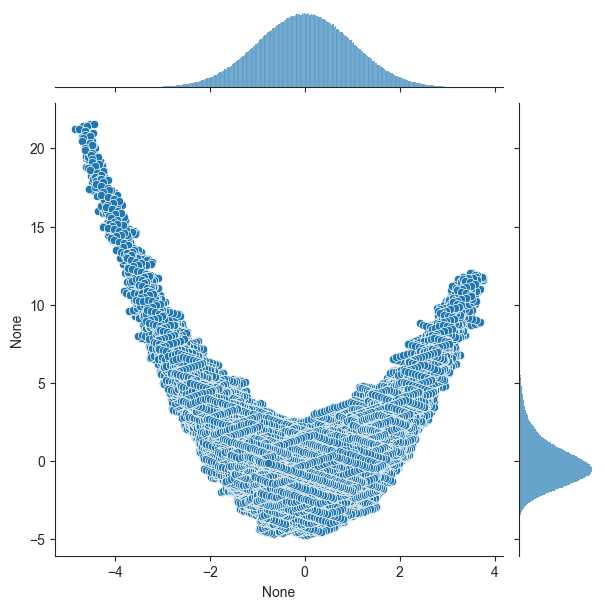

In [6]:
sampler = pdmp.NonExploSpeedupZigZag(dim, grad_U, grid_size)

sample_suzz = sampler.sample(
    N_sk=N_sk, N_samples=N, xinit=xinit, vinit=vinit, seed=seed, verbose=True
)

# plot the first two dimensions of the sample
plt.figure()
sns.jointplot(x=sample_suzz[:, 0], y=sample_suzz[:, 1])
plt.show()
